In [40]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict


In [15]:
class BatsmanState(TypedDict) :
    runs: int
    balls: int
    fours: int
    sixes: int

    sr: float
    bpb: float
    boundary_percentage: float
    summary: str

In [36]:
def calculate_sr(state: BatsmanState) -> BatsmanState :
    sr = (state['runs']/state['balls'])*100
    return {'sr': sr}

In [27]:
def calculate_bpb(state: BatsmanState) -> BatsmanState :
    bpb = state['balls']/(state['fours'] + state['sixes'])
    return {'bpb': bpb}

In [28]:
def calculate_boundary_percentage(state: BatsmanState) -> BatsmanState :
    boundary_percentage = ((state['fours']*4 + state['sixes']*6)/state['runs'])*100
    return {'boundary_percentage': boundary_percentage}

In [34]:
def summary(state: BatsmanState) -> BatsmanState :
    summary = f""" 
Strike Rate - {state['sr']} \n
Balls per Boundary - {state['bpb']} \n
Boundary Percentage - {state['boundary_percentage']}
"""
    return {'summary': summary}

In [37]:
graph = StateGraph(BatsmanState) 

graph.add_node('calculate_sr', calculate_sr)
graph.add_node('calculate_bpb', calculate_bpb)
graph.add_node('calculate_boundary_percentage', calculate_boundary_percentage)
graph.add_node('summary', summary)

graph.add_edge(START, 'calculate_sr')
graph.add_edge(START , 'calculate_bpb')
graph.add_edge(START, 'calculate_boundary_percentage')

graph.add_edge('calculate_sr' , 'summary')
graph.add_edge('calculate_bpb' , 'summary')
graph.add_edge('calculate_boundary_percentage' , 'summary')

graph.add_edge('summary', END)

workflow = graph.compile()




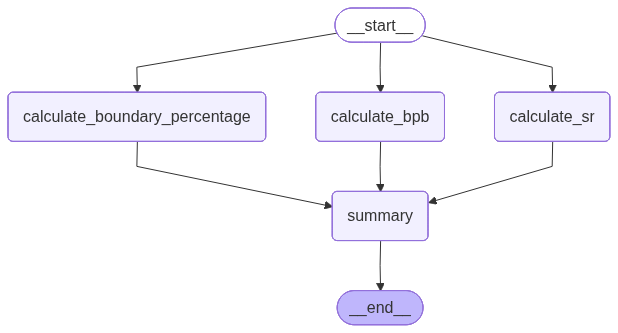

In [38]:
workflow

In [39]:
initial_state = {'runs': 60 , 'balls': 50 , 'fours': 5 , 'sixes': 3}
final_state = workflow.invoke(initial_state)
print(final_state)

{'runs': 60, 'balls': 50, 'fours': 5, 'sixes': 3, 'sr': 120.0, 'bpb': 6.25, 'boundary_percentage': 63.33333333333333, 'summary': ' \nStrike Rate - 120.0 \n\nBalls per Boundary - 6.25 \n\nBoundary Percentage - 63.33333333333333\n'}
